# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.416  1  0.738 0.391 0.004   
                             age        0.207  1  0.367 0.545 0.002   
                             Kiel       2.475  1  4.389 0.037 0.022   
                             Magdeburg  4.990  1  8.849 0.003 0.044   
                             Sweden     8.747  1 15.513 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.338  1  0.347 0.557 0.002   
                             age        1.017  1  1.042 0.309 0.005   
                             Kiel       0.000  1  0.000 0.986 0.000   
                             Magdeburg  3.265  1  3.347 0.069 0.017   
                             Sweden    15.081  1 15.462 0.000 0.075   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.407  0.554    False  
                             age               0.263  0.689    False  
                             Kiel              1.426  0.097    False  
                             Magdeburg         2.480  0.014     True  
                             Sweden            3.940  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.254  0.698    False  
                             age               0.511  0.472    False  
                             Kiel              0.006  0.992    False  
                             Magdeburg         1.162  0.157    False  
                             Sweden            3.929  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.866  1  5.241 0.023 0.027   
                             age        0.015  1  0.088 0.767 0.000   
                             Kiel       0.467  1  2.826 0.094 0.015   
                             Magdeburg  0.938  1  5.680 0.018 0.029   
                             Sweden     2.407  1 14.574 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.881  1  0.514 0.474 0.003   
                             age        1.586  1  0.925 0.337 0.005   
                             Kiel       8.140  1  4.748 0.031 0.024   
                             Magdeburg 16.924  1  9.871 0.002 0.049   
                             Sweden     0.048  1  0.028 0.867 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.635  0.062    False  
                             age               0.115  0.846    False  
                             Kiel              1.025  0.188    False  
                             Magdeburg         1.741  0.050    False  
                             Sweden            3.740  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.324  0.613    False  
                             age               0.472  0.487    False  
                             Kiel              1.515  0.077    False  
                             Magdeburg         2.711  0.008     True  
                             Sweden            0.062  0.916    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.391         0.407  0.554    False   
                             age       0.545         0.263  0.689    False   
                             Kiel      0.037         1.426  0.097    False   
                             Magdeburg 0.003         2.480  0.014     True   
                             Sweden    0.000         3.940  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.557         0.254  0.698    False   
                             age       0.309         0.511  0.472    False   
                             Kiel      0.986         0.006  0.992    False   
                             Magdeburg 0.069         1.162  0.157    False   
                             Sweden    0.000         3.929  0.001     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.023         1.635  0.062    False  
                             age       0.767         0.115  0.846    False  
                             Kiel      0.094         1.025  0.188    False  
                             Magdeburg 0.018         1.741  0.050    False  
                             Sweden    0.000         3.740  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.474         0.324  0.613    False  
                             age       0.337         0.472  0.487    False  
                             Kiel      0.031         1.515  0.077    False  
                             Magdeburg 0.002         2.711  0.008     True  
                             Sweden    0.867         0.062  0.916    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.477     0.338     0.244         2.749     0.310
std       0.303         5.327     0.331     0.296         5.161     0.324
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.335     0.015     0.002         0.362     0.008
50%       0.124         0.906     0.248     0.093         1.034     0.185
75%       0.463         2.427     0.617     0.435         2.719     0.579
max       0.999       144.268     0.999     1.000        85.232     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.391         0.407   
A0A024R0T9;K7ER74;P02655                           AD     0.046         1.336   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.077         1.115   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.713         0.147   
A0A075B6H7                                         AD     0.083         1.079   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.066         1.179   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.334         0.476   
S4R3U6                                             AD     0.557         0.254   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.554    False   
A0A024R0T9;K7ER74;P02655                           AD      0.114    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.171    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.819    False   
A0A075B6H7                                         AD      0.182    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.317    False   
Q9Y6X5                                             AD      0.152    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.499    False   
S4R3U6                                             AD      0.698    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.023         1.635   
A0A024R0T9;K7ER74;P02655                           AD     0.039         1.407   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.313         0.505   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.301         0.521   
A0A075B6H7                                         AD     0.059         1.228   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.082         1.086   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.903         0.045   
S4R3U6                                             AD     0.474         0.324   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.062    False  
A0A024R0T9;K7ER74;P02655                           AD      0.094    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.461    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.450    False  
A0A075B6H7                                         AD      0.130    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.254         1.394     0.337     0.249         1.496     0.321
std       0.290         1.616     0.316     0.291         1.794     0.315
min       0.000         0.000     0.000     0.000         0.001     0.000
25%       0.012         0.364     0.040     0.010         0.357     0.030
50%       0.125         0.903     0.250     0.109         0.965     0.210
75%       0.433         1.911     0.590     0.439         2.009     0.583
max       0.999        22.202     0.999     0.999        26.462     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1036,997


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.391         0.407  0.554   
A0A024R0T9;K7ER74;P02655                           0.046         1.336  0.114   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.077         1.115  0.171   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.713         0.147  0.819   
A0A075B6H7                                         0.083         1.079  0.182   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.317   
Q9Y6X5                                             0.066         1.179  0.152   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.334         0.476  0.499   
S4R3U6                                             0.557         0.254  0.698   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.023   
A0A024R0T9;K7ER74;P02655                              False 0.039   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.313   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.301   
A0A075B6H7                                            False 0.059   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.082   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.903   
S4R3U6                                                False 0.474   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.635  0.062   
A0A024R0T9;K7ER74;P02655                                   1.407  0.094   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.505  0.461   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.521  0.450   
A0A075B6H7                                                 1.228  0.130   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.086  0.168   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.045  0.938   
S4R3U6                                                     0.324  0.613   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    964
PI (yes) - QRILC (yes)   352
PI (no)  - QRILC (yes)    72
PI (yes) - QRILC (no)     33
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.022         1.654  0.065    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.013         1.872  0.043     True   
A0A087WWT2;Q9NPD7                     0.033         1.487  0.087    False   
A0A087WXB8;Q9Y274                     0.001         2.932  0.006     True   
A0A087X0M8                            0.049         1.310  0.120    False   
...                                     ...           ...    ...      ...   
Q9NYX4                                0.060         1.220  0.142    False   
Q9NZ94;Q9NZ94-2;Q9NZ94-3              0.739         0.131  0.837    False   
Q9P0K9                                0.025         1.599  0.072    False   
Q9UJ14                                0.024         1.612  0.070    False   
Q9UQ52                                0.079         1.104  0.174    False   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.003         2.534  0.011     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.173         0.762  0.299    False   
A0A087WWT2;Q9NPD7                     0.006         2.193  0.021     True   
A0A087WXB8;Q9Y274                     0.109         0.962  0.211    False   
A0A087X0M8                            0.003         2.489  0.012     True   
...                                     ...           ...    ...      ...   
Q9NYX4                                0.007         2.161  0.023     True   
Q9NZ94;Q9NZ94-2;Q9NZ94-3              0.018         1.750  0.050     True   
Q9P0K9                                0.010         2.001  0.031     True   
Q9UJ14                                0.011         1.959  0.033     True   
Q9UQ52                                0.002         2.698  0.008     True   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087WXB8;Q9Y274                            89  
A0A087X0M8                                  189  
...                                         ...  
Q9NYX4                                      195  
Q9NZ94;Q9NZ94-2;Q9NZ94-3                    115  
Q9P0K9                                      192  
Q9UJ14                                      169  
Q9UQ52                                      188  

[105 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.554,0.062,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.114,0.094,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.171,0.461,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.819,0.450,196,PI (no) - QRILC (no)
A0A075B6H7,0.182,0.130,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.317,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.152,0.168,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.990,0.011,86,PI (no) - QRILC (yes),0.980
P43004;P43004-2;P43004-3,0.930,0.043,89,PI (no) - QRILC (yes),0.886
J3KSJ8;Q9UD71;Q9UD71-2,0.844,0.018,51,PI (no) - QRILC (yes),0.826
Q9NZ94;Q9NZ94-2;Q9NZ94-3,0.837,0.050,115,PI (no) - QRILC (yes),0.787
P35754,0.038,0.805,143,PI (yes) - QRILC (no),0.767
...,...,...,...,...,...
Q96RW7;Q96RW7-2,0.048,0.068,80,PI (yes) - QRILC (no),0.020
Q16706,0.061,0.044,195,PI (no) - QRILC (yes),0.017
Q7Z7H5;Q7Z7H5-3,0.059,0.043,176,PI (no) - QRILC (yes),0.017


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


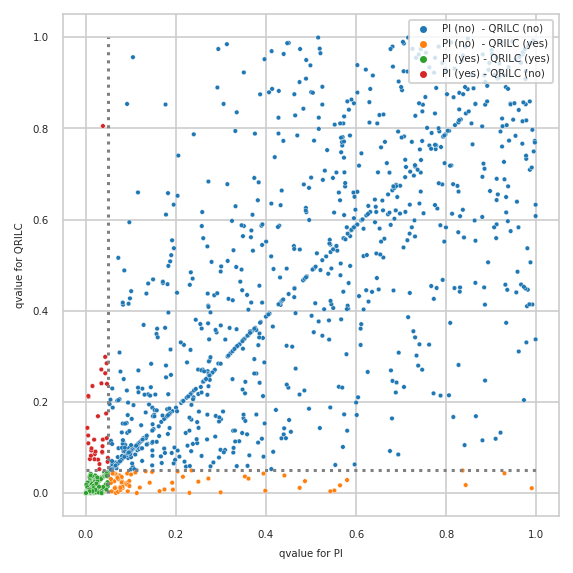

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


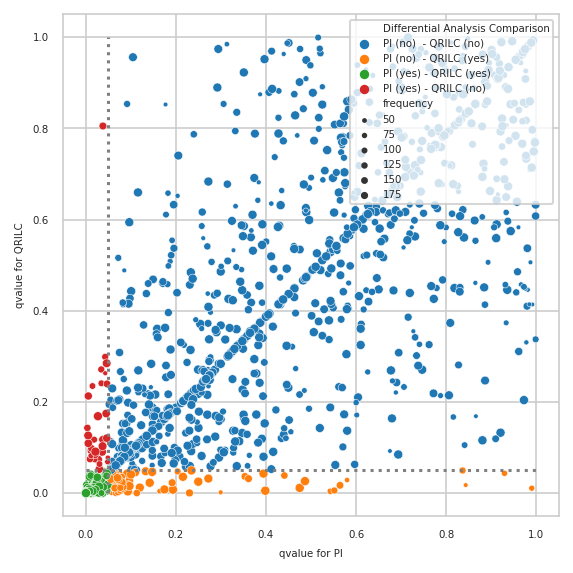

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out